<a href="https://colab.research.google.com/github/Bonjiang/sqlite_database_operations/blob/main/504_Week_3_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy  import create_engine
import sqlite3

## **Stony Brook University Hospital Dataset**

In [ ]:
df= pd.read_csv('stonybrook.csv')
df

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Overview

In [150]:
first_rows = df.head
first_rows

<bound method NDFrame.head of        Billing/Charge Code                               Charge Description   \
0               3018437801    HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378   
1               3018263400                               HC 11 DEOXYCORTISOL   
2               3018414300                          HC 17 HYDROXPREGNENOLONE   
3               3018349800                         HC 17 HYDROXYPROGESTERONE   
4               3603621500                    HC 1ST ORD SEL CATH ART THORAC   
...                    ...                                               ...   
65023           6370000002                      XRX ZONISAMIDE 25 MG PO CAPS   
65024           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65025           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65026           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65027           6360000001  XRX ZOSTER VACCINE LIVE 19400 UNT/0.65ML SC SUSR   

       Re

##### *There are many N/A values in the dataset*

### Checking for Missing Values

In [135]:
missing_values = df.isnull().sum()
missing_values

Code                                               0
Description                                        0
Type                                             783
Package/Line_Level                               783
Gross charge                                       0
Discounted cash price                              0
De-identified min contracted rate               1456
De-identified max contracted rate               1456
Derived contracted rate                         1456
1199-Commercial other                           6696
Aetna-Medicare Advantage HMO                    6604
Aetna-Commercial HMO/POS                        5883
Aetna-Commercial PPO/Open Access                6098
Aetna-Commercial other                          7582
Empire Health-Commercial other                  4650
Empire Health-Commercial PPO/Open Access        5308
BlueCross BlueShield-Commercial other           6456
Beacon Health-Commercial other                  7707
Carelon Health-Commercial other               

##### *So many missing values 😕*

### Frequency Counts for Categorical Columns

In [136]:
print(df['Description'].value_counts())

R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                                      1
SEMI-PRIVATE                            

In [137]:
print(df['Type'].value_counts())

Outpatient    6041
Inpatient      886
Name: Type, dtype: int64


In [138]:
print(df['Package/Line_Level'].value_counts())

Line       4691
Package    2236
Name: Package/Line_Level, dtype: int64


### Using a loop to create histograms for all numerical columns in the dataframe

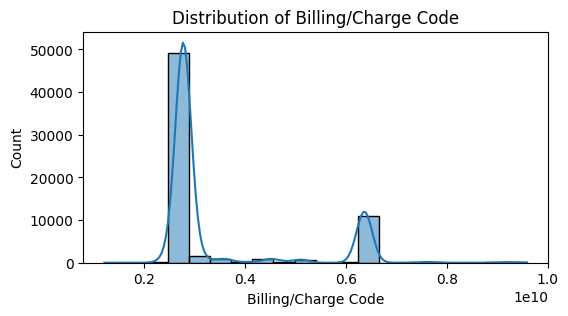

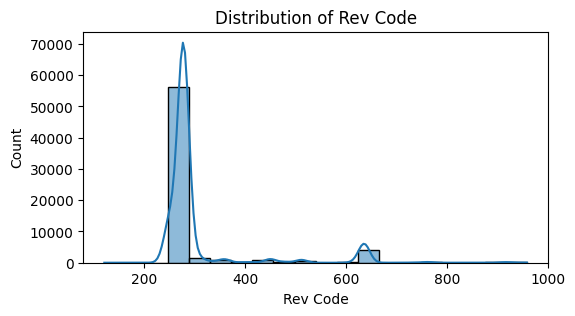

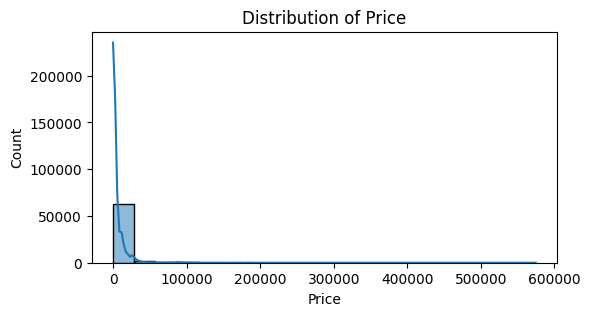

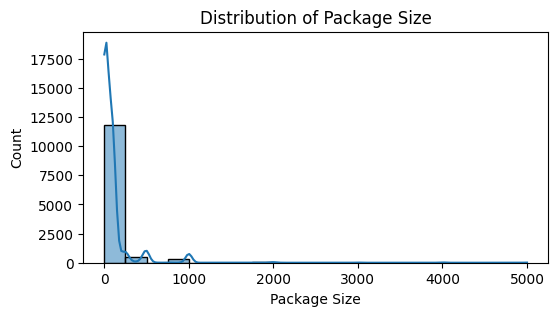

In [143]:
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### *Some of the graphs do not showcase any data because all their values are N/A*

### Using a loop to create boxplots for all numerical columns in the dataframe

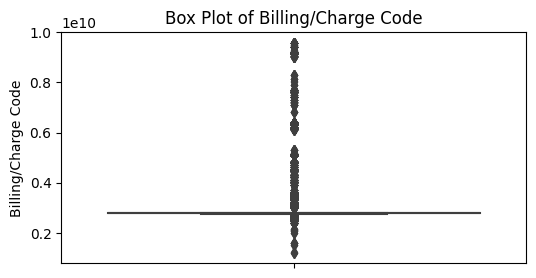

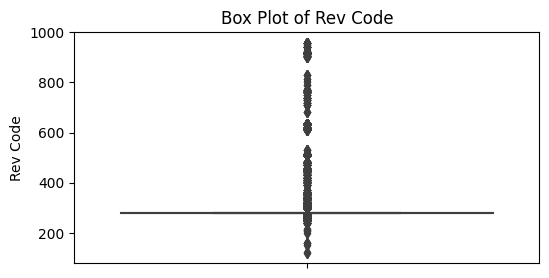

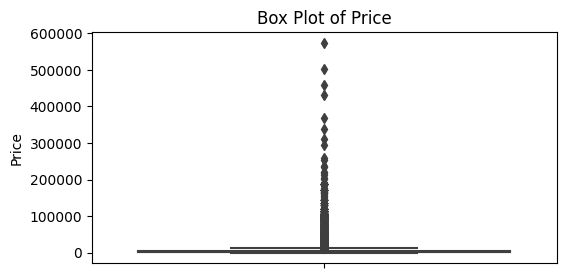

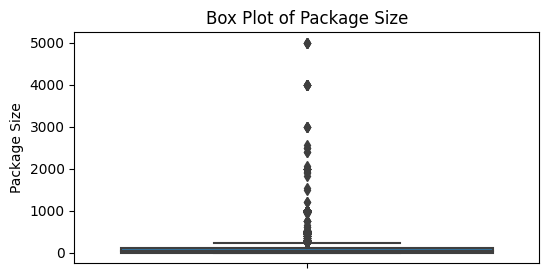

In [144]:
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

##### *Some of the graphs do not showcase any outliers because all their values are N/A and there are less outliers than I expected*

### Summary Statistics

In [139]:
summary_statistics = df.describe()
summary_statistics

,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,Aetna-Medicare Advantage HMO,Aetna-Commercial HMO/POS,Aetna-Commercial PPO/Open Access,Aetna-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


## **Catholic Health St. Joseph Hospital Dataset**

In [142]:
df= pd.read_excel('1013998426_wsnchs-north-inc.-dba-st.-joseph-hospital_standardcharges.xlsx')
df

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65023,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65024,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65025,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65026,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


### Data Overview

In [151]:
first_rows = df.head
first_rows

<bound method NDFrame.head of        Billing/Charge Code                               Charge Description   \
0               3018437801    HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378   
1               3018263400                               HC 11 DEOXYCORTISOL   
2               3018414300                          HC 17 HYDROXPREGNENOLONE   
3               3018349800                         HC 17 HYDROXYPROGESTERONE   
4               3603621500                    HC 1ST ORD SEL CATH ART THORAC   
...                    ...                                               ...   
65023           6370000002                      XRX ZONISAMIDE 25 MG PO CAPS   
65024           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65025           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65026           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65027           6360000001  XRX ZOSTER VACCINE LIVE 19400 UNT/0.65ML SC SUSR   

       Re

### Checking for Missing Values

In [140]:
missing_values = df.isnull().sum()
missing_values

Code                                               0
Description                                        0
Type                                             783
Package/Line_Level                               783
Gross charge                                       0
Discounted cash price                              0
De-identified min contracted rate               1456
De-identified max contracted rate               1456
Derived contracted rate                         1456
1199-Commercial other                           6696
Aetna-Medicare Advantage HMO                    6604
Aetna-Commercial HMO/POS                        5883
Aetna-Commercial PPO/Open Access                6098
Aetna-Commercial other                          7582
Empire Health-Commercial other                  4650
Empire Health-Commercial PPO/Open Access        5308
BlueCross BlueShield-Commercial other           6456
Beacon Health-Commercial other                  7707
Carelon Health-Commercial other               

##### *Also many missing values*

### Frequency Counts for Categorical Columns

In [145]:
print(df['Package Description'].value_counts())

Bottle          4811
Vial            2950
Box             1140
Blister          971
Flex Cont        783
Syringe          489
Tube             433
Bag              193
Cup              187
Plas Cont        173
Ampule           146
Glass Cont        79
Package           67
Packet            60
Jar               43
Inhaler           32
Disp Pack         29
Can               18
Cartridge         12
Pen                7
Pump Btl           5
Crtrdg-NDL         5
Sachet             4
Patch              4
Spray Bottle       4
Roll               3
Punchcard          1
Name: Package Description, dtype: int64


In [152]:
print(df['Package Unit'].value_counts())

each                6935
mL                  5157
g                    577
Units                 15
Package                7
halved tablet          7
mg                     3
mcg                    3
capsule                3
quartered tablet       2
oz                     1
kit                    1
vial                   1
Name: Package Unit, dtype: int64


### Using a loop to create histograms for all numerical columns in the dataframe

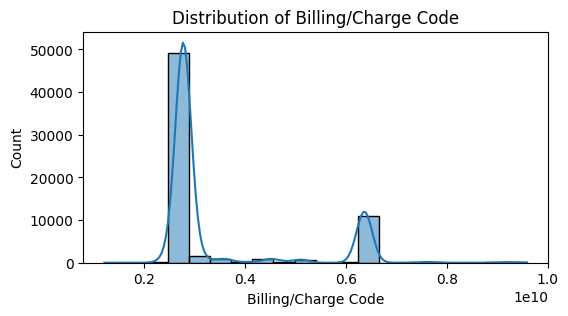

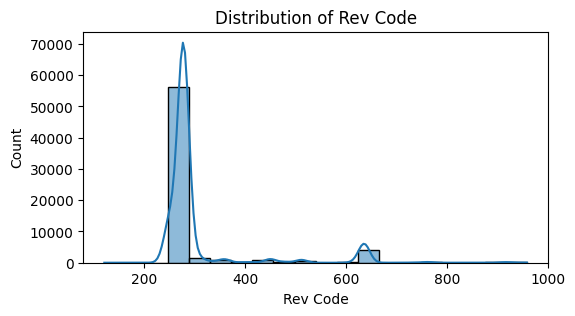

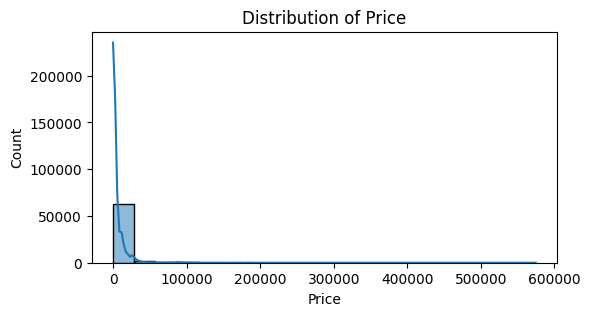

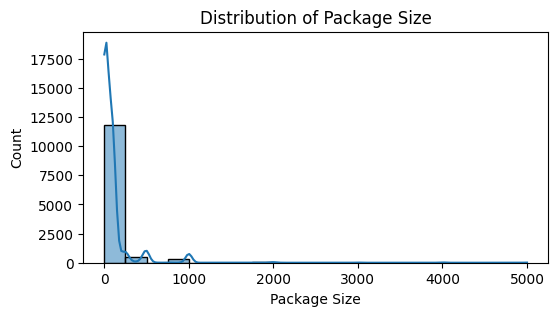

In [146]:
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

##### *Histograms are right skewed*

### Using a loop to create boxplots for all numerical columns in the dataframe

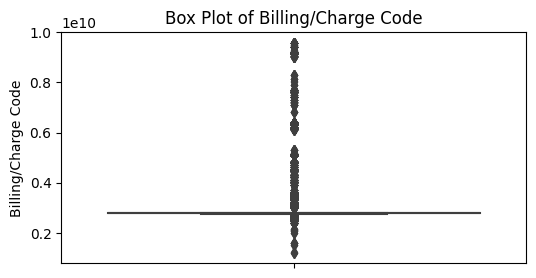

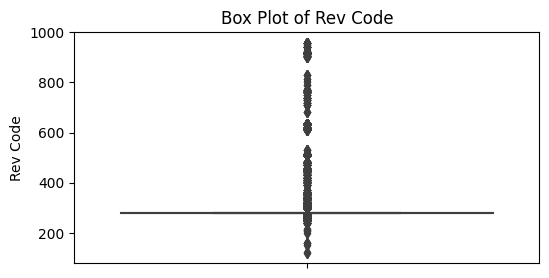

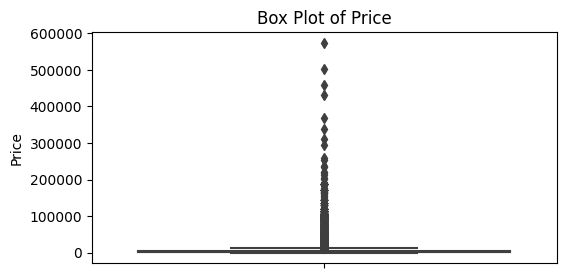

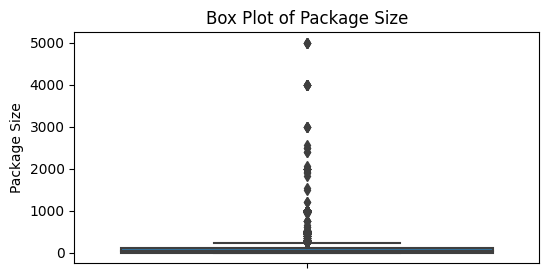

In [147]:
for col in df.select_dtypes(include=['int', 'float']):
    plt.figure(figsize=(6, 3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.show()

##### *Boxplot looks similar to the previous dataset boxplot*

### Summary Statistics

In [148]:
summary_statistics = df.describe()
summary_statistics

,Billing/Charge Code,Rev Code,Price,Package Size
count,6.502800e+04,65028.000000,64936.000000,12712.000000
mean,3.489521e+09,307.424002,5967.909789,99.120812
std,1.418973e+09,103.065099,13567.489890,250.988879
min,1.210000e+09,121.000000,0.000000,0.025000
25%,2.780171e+09,278.000000,431.250000,2.000000
50%,2.780176e+09,278.000000,2077.360000,30.000000
75%,2.799000e+09,279.000000,5750.000000,100.000000
max,9.590102e+09,959.000000,574568.750000,5000.000000


## **SQLite Database Operations**

### Creating a temporary + local DB using SQLITE

In [131]:
conn = sqlite3.connect('health.db')
c = conn.cursor()

### Creating new table called stonybrook

In [ ]:
c.execute("""
            CREATE TABLE stonybrook
                (
                    hospital_name text,
                    insurance_type text,
                    type_text,
                    code,
                    cost_minimum real,
                    cost_maximum real
                );
          """)

conn.commit()

### Inserting in data

In [ ]:
sql_query = """

INSERT INTO stonybrook (
  'hospital_name',
  'insurance_type',
  'type_text',
  'code',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'southampton hospital',
    'aetna',
    'outpatient',
    '1004X',
    '1.00',
    '1000.00'
  );

"""

print(sql_query)

In [ ]:
c.execute(sql_query)
conn.commit()

### Checking that the one row has been inserted using sqlite

In [ ]:
sql_query_2 = """

select *
from stonybrook;

"""

c.execute(sql_query_2)
print(c.fetchall())

### Automatic Table Creation

In [128]:
df.to_sql('stonybrook', conn, if_exists='replace', index=False)


7710

### Checking if it works

In [155]:
query = """
  select *
  from stonybrook
  where code = '003X'
  limit 10;
"""

response = pd.read_sql(query, conn)
response

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,003X,Bone Marrow Transplant,Inpatient,Line,557046.21,557046.21,35620.0,92452.99,53264.34,None,...,None,None,None,None,None,None,None,None,None,None


In [129]:
conn.close()